In [20]:
from sqlalchemy import create_engine, text
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# --- Credenciales de conexión ---
db_user = "etl25"
db_pass = "etl25"
db_host = "localhost"
db_port = "5433"
db_name = "dw_icfes"

# --- Crear conexión ---
engine = create_engine(f"postgresql+psycopg2://{db_user}:{db_pass}@{db_host}:{db_port}/{db_name}")

# --- Probar conexión ---
with engine.connect() as conn:
    result = conn.execute(text("SELECT version();"))
    print("Conexión exitosa a PostgreSQL")
    print(result.scalar())

Conexión exitosa a PostgreSQL
PostgreSQL 16.10 (Debian 16.10-1.pgdg13+1) on x86_64-pc-linux-gnu, compiled by gcc (Debian 14.2.0-19) 14.2.0, 64-bit


## **Consultas**

Comprobar si el contexto socioeconómico influye en desempeño académico

**Consulta 1: Impacto del Indice de desarrollo humanitario (IDH) en las áreas del conocimiento**

In [17]:
query1 = """
SELECT 
    ROUND(CAST(d.idh_depto AS numeric), 3) AS idh,
    ROUND(AVG(f.punt_matematicas), 2) AS matematicas,
    ROUND(AVG(f.punt_lectura_critica), 2) AS lectura_critica,
    ROUND(AVG(f.punt_c_naturales), 2) AS naturales,
    ROUND(AVG(f.punt_sociales_ciudadanas), 2) AS sociales
FROM fact_icfes f
JOIN dim_departamento d 
    ON f.id_departamento = d.id_departamento
GROUP BY d.idh_depto
ORDER BY idh ASC;
"""

df1 = pd.read_sql_query(query1, engine)
df1.head(10)




,idh,matematicas,lectura_critica,naturales,sociales
0,0.000,55.88,58.94,54.94,52.00
1,0.681,42.50,47.06,42.96,41.50
2,0.702,46.40,49.61,45.91,45.05
3,0.721,42.42,46.37,42.32,41.04
4,0.732,45.66,48.57,45.31,43.04
5,0.751,49.88,51.51,49.47,46.56
6,0.753,49.74,51.20,47.96,46.92
7,0.758,49.93,51.19,48.50,46.29
8,0.760,50.14,51.48,48.94,46.96
9,0.763,53.99,54.06,52.19,49.77


**Consulta 2: Promedio de puntaje por área de conocimiento**

In [6]:
query2 = """
SELECT 
    ROUND(AVG(punt_lectura_critica), 2) AS lectura_critica,
    ROUND(AVG(punt_matematicas), 2) AS matematicas,
    ROUND(AVG(punt_sociales_ciudadanas), 2) AS sociales,
    ROUND(AVG(punt_c_naturales), 2) AS naturales,
    ROUND(AVG(punt_ingles), 2) AS ingles
FROM fact_icfes;
"""
df2 = pd.read_sql_query(query2, engine)
df2


,lectura_critica,matematicas,sociales,naturales,ingles
0,53.77,52.05,48.8,50.48,51.74


**Consulta 3: Relación entre pobreza monetaria y desempeño por área de conocimiento**

In [19]:
query3 = """
SELECT 
        ROUND(CAST(d.pobreza_monetaria_depto AS numeric), 1) AS pobreza_monetaria,
        ROUND(AVG(f.punt_global), 2) AS puntaje_global,
        ROUND(AVG(f.punt_matematicas), 2) AS matematicas,
        ROUND(AVG(f.punt_lectura_critica), 2) AS lectura_critica,
        ROUND(AVG(f.punt_c_naturales), 2) AS naturales,
        ROUND(AVG(f.punt_sociales_ciudadanas), 2) AS sociales
FROM fact_icfes f
JOIN dim_departamento d 
        ON f.id_departamento = d.id_departamento
GROUP BY d.pobreza_monetaria_depto
ORDER BY pobreza_monetaria ASC;
"""

df3 = pd.read_sql_query(query3, engine)
df3.head(10)


,pobreza_monetaria,puntaje_global,matematicas,lectura_critica,naturales,sociales
0,0.0,280.12,55.88,58.94,54.94,52.00
1,19.6,273.84,55.65,56.90,53.34,52.28
2,20.0,259.34,52.68,54.30,51.01,49.33
3,20.1,264.61,54.19,55.22,51.70,50.35
4,23.6,255.41,52.34,53.56,50.24,48.33
5,23.8,259.84,52.48,54.38,50.81,49.68
6,24.7,249.94,50.17,53.02,48.62,47.94
7,25.7,259.38,52.10,54.50,51.00,49.56
8,25.9,270.58,55.23,56.06,53.14,51.60
9,27.4,272.10,56.06,56.38,53.70,51.63


**Consulta 4: Promedio global por nivel socioeconómico (Estrato)**

In [8]:
query4 = """
SELECT c.fami_estratovivienda AS estrato,
        ROUND(AVG(f.punt_global), 2) AS promedio_global
FROM fact_icfes f
JOIN dim_contexto_socioeconomico c ON f.id_contexto = c.id_contexto
GROUP BY c.fami_estratovivienda
ORDER BY estrato;
"""
df4 = pd.read_sql_query(query4, engine)
df4


,estrato,promedio_global
0,0,222.85
1,1,245.16
2,2,258.97
3,3,267.63
4,4,272.56
5,5,275.79
6,6,275.79


**Consulta 5 : Promedio del puntaje global por nivel socioeconómico (NSE- nivel socioeconómico individual)**

In [9]:
query5 = """
SELECT 
    c.estu_nse_individual AS nivel_socioeconomico,
    ROUND(AVG(f.punt_global), 2) AS promedio_global,
    ROUND(AVG(f.percentil_global), 2) AS promedio_percentil
FROM fact_icfes f
JOIN dim_contexto_socioeconomico c 
    ON f.id_contexto = c.id_contexto
GROUP BY c.estu_nse_individual
ORDER BY nivel_socioeconomico;
"""
df5 = pd.read_sql_query(query5, engine)
df5


,nivel_socioeconomico,promedio_global,promedio_percentil
0,1.0,230.60,35.31
1,2.0,239.51,38.63
2,3.0,271.04,56.22
3,4.0,308.76,73.85


## **Visualizaciones**

**Visualización 1: IDH vs Tasa de Alto Desempeño (ponderada por población Dept)**

In [31]:
query_tasa = """
SELECT 
    d.id_departamento,
    d.estu_depto_reside AS nombre_departamento,
    ROUND(CAST(d.idh_depto AS numeric), 3) AS idh,
    d.poblacion_depto,
    COUNT(f.punt_global) AS total_estudiantes,
    SUM(CASE WHEN f.punt_global >= 300 THEN 1 ELSE 0 END) AS alto_desempeno,
    ROUND(
        CAST(
            SUM(CASE WHEN f.punt_global >= 300 THEN 1 ELSE 0 END) * 1000.0 
            / NULLIF(d.poblacion_depto, 0)
        AS numeric),
    3) AS tasa_alto_desempeno_1000
FROM fact_icfes f
JOIN dim_departamento d 
    ON f.id_departamento = d.id_departamento
GROUP BY d.id_departamento, d.estu_depto_reside, d.idh_depto, d.poblacion_depto
ORDER BY tasa_alto_desempeno_1000 DESC;
"""

df_tasa = pd.read_sql_query(query_tasa, engine)
df_tasa.head(10)


,id_departamento,nombre_departamento,idh,poblacion_depto,total_estudiantes,alto_desempeno,tasa_alto_desempeno_1000
0,34,EXTRANJERO,0.000,0,17,6,NaN
1,24,BOYACÁ,0.808,1324122,20438,6572,4.963
2,10,SANTANDER,0.821,2393214,30373,9689,4.049
3,1,"BOGOTÁ, D.C.",0.890,7937898,89797,28453,3.584
4,9,NARIÑO,0.763,1719281,22658,6083,3.538
5,15,HUILA,0.767,1205318,16198,4077,3.383
6,3,QUINDÍO,0.832,568560,5729,1796,3.159
7,23,CASANARE,0.791,481938,6763,1451,3.011
8,17,NORTE DE SANTANDER,0.778,1717992,19923,5043,2.935
9,4,CUNDINAMARCA,0.826,3657407,42059,10425,2.850


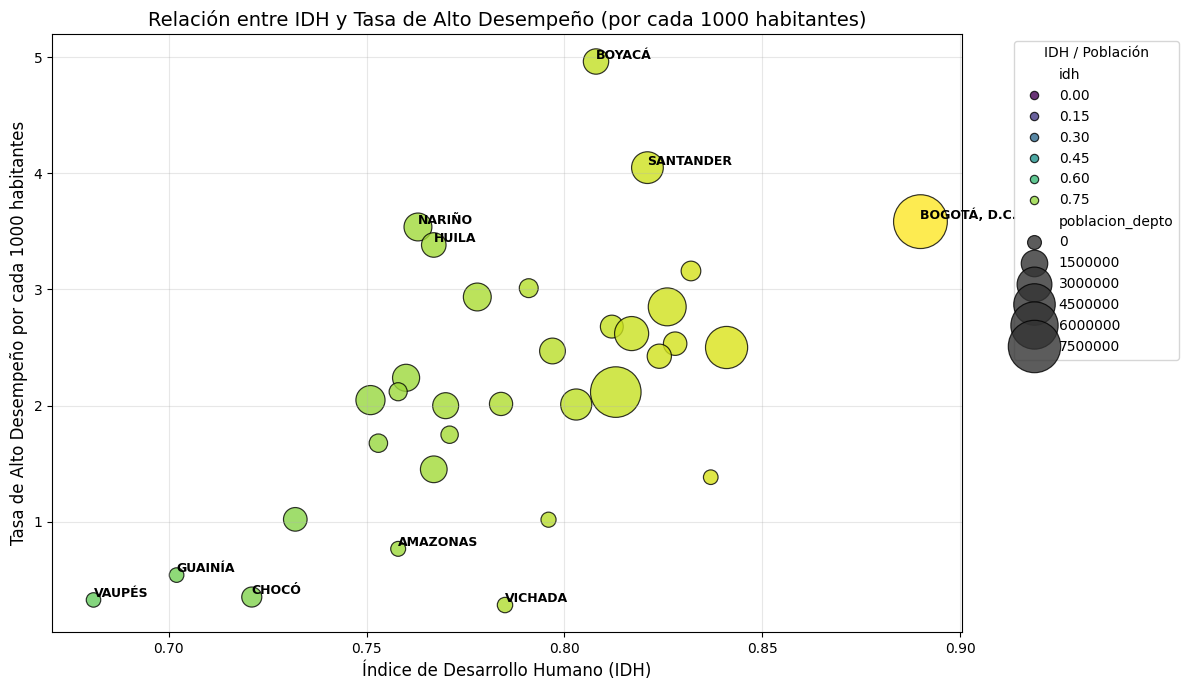

In [41]:
plt.figure(figsize=(12, 7))

# --- Gráfico de dispersión ---
sns.scatterplot(
    data=df_tasa,
    x="idh",
    y="tasa_alto_desempeno_1000",
    size="poblacion_depto",
    hue="idh",
    palette="viridis",
    sizes=(100, 1500),
    alpha=0.8,
    edgecolor="black",
    legend="brief"
)

# --- Etiquetar los 5 con mayor y menor tasa ---
top5 = df_tasa.nlargest(5, "tasa_alto_desempeno_1000")
bottom5 = df_tasa.nsmallest(5, "tasa_alto_desempeno_1000")
for _, row in pd.concat([top5, bottom5]).iterrows():
    plt.text(
        row["idh"], 
        row["tasa_alto_desempeno_1000"], 
        row["nombre_departamento"], 
        fontsize=9, 
        fontweight='bold',
        ha='left',
        va='bottom'
    )

# --- Personalización del gráfico ---
plt.title("Relación entre IDH y Tasa de Alto Desempeño (por cada 1000 habitantes)", fontsize=14)
plt.xlabel("Índice de Desarrollo Humano (IDH)", fontsize=12)
plt.ylabel("Tasa de Alto Desempeño por cada 1000 habitantes", fontsize=12)
plt.grid(alpha=0.3)
plt.legend(title="IDH / Población", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


El gráfico muestra la relación entre el Índice de Desarrollo Humano (IDH) y la tasa de alto desempeño académico (número de estudiantes con puntaje global ≥ 300 por cada 1000 habitantes).
Esta tasa permite comparar de forma justa departamentos grandes y pequeños, ya que normaliza el desempeño según el tamaño de la población.

En la visualización, se observa que departamentos con mayor IDH, como Bogotá D.C. y Santander, tienden a presentar tasas más altas de estudiantes destacados, mientras que regiones con menor IDH —como Chocó, Guainía o Vaupés— presentan tasas bajas.
Esto sugiere una relación positiva entre el desarrollo humano y el rendimiento educativo, reflejando que el contexto socioeconómico incide directamente en las oportunidades de aprendizaje y desempeño de los estudiantes.

**Visualización 2: Pobreza Monetaria vs Tasa de Alto Desempeño (ponderada por población Dept)**

In [34]:
query_pobreza = """
SELECT 
    d.id_departamento,
    d.estu_depto_reside AS nombre_depto,
    ROUND(CAST(d.pobreza_monetaria_depto AS numeric), 2) AS pobreza,
    d.poblacion_depto,
    COUNT(f.punt_global) AS total_estudiantes,
    SUM(CASE WHEN f.punt_global >= 300 THEN 1 ELSE 0 END) AS alto_desempeno,
    ROUND(
        CAST(
            SUM(CASE WHEN f.punt_global >= 300 THEN 1 ELSE 0 END) * 1000.0 
            / NULLIF(d.poblacion_depto, 0)
        AS numeric),
    3) AS tasa_alto_desempeno_1000
FROM fact_icfes f
JOIN dim_departamento d 
    ON f.id_departamento = d.id_departamento
GROUP BY d.id_departamento, d.estu_depto_reside, d.poblacion_depto, d.pobreza_monetaria_depto
ORDER BY pobreza ASC;
"""

df_pobreza = pd.read_sql_query(query_pobreza, engine)
df_pobreza.head()



,id_departamento,nombre_depto,pobreza,poblacion_depto,total_estudiantes,alto_desempeno,tasa_alto_desempeno_1000
0,34,EXTRANJERO,0.0,0,17,6,NaN
1,1,"BOGOTÁ, D.C.",19.6,7937898,89797,28453,3.584
2,16,CALDAS,20.0,1051282,10900,2663,2.533
3,4,CUNDINAMARCA,20.1,3657407,42059,10425,2.850
4,20,META,23.6,1160351,14235,2814,2.425


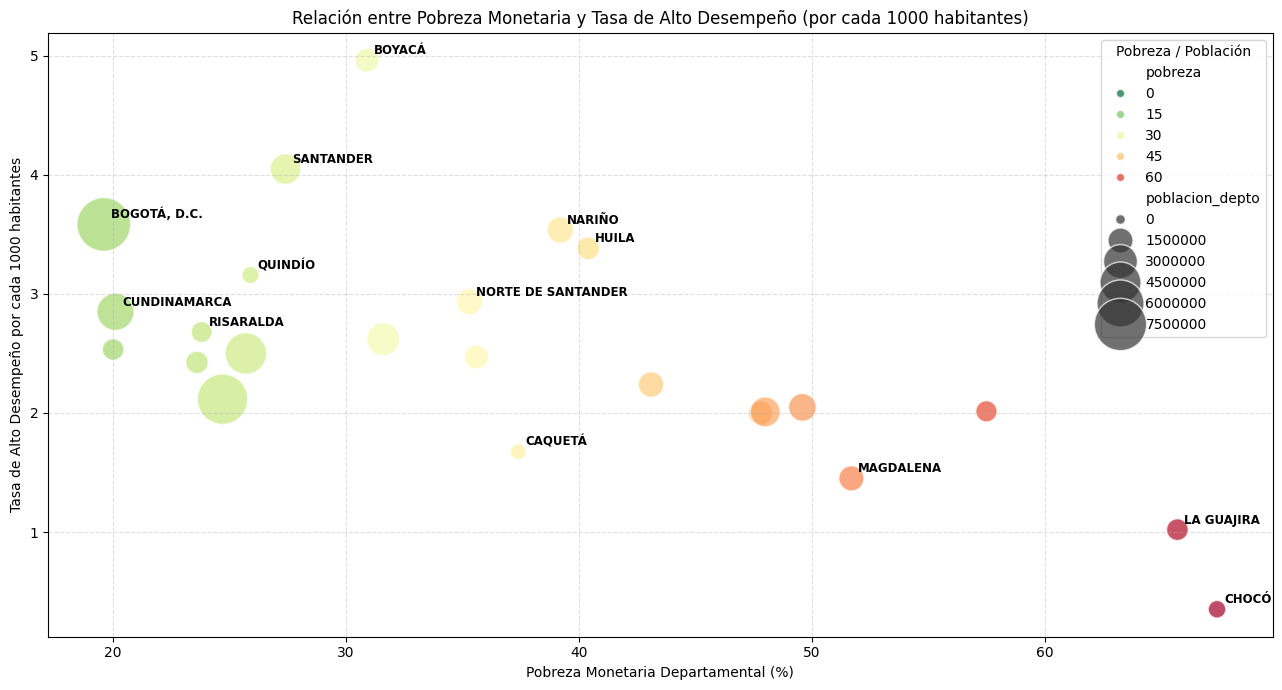

In [37]:

plt.figure(figsize=(13,7))

sns.scatterplot(
    data=df_pobreza,
    x="pobreza",
    y="tasa_alto_desempeno_1000",
    size="poblacion_depto",
    hue="pobreza",
    palette="RdYlGn_r",
    sizes=(50, 1500),
    alpha=0.7,
    legend="brief"
)

# --- Seleccionar 10 con mayor y 10 con menor tasa ---
destacados = pd.concat([
    df_pobreza.nlargest(10, 'tasa_alto_desempeno_1000'),
    df_pobreza.nsmallest(10, 'tasa_alto_desempeno_1000')
])

# --- Etiquetas con ligero desplazamiento horizontal ---
for i, row in destacados.iterrows():
    plt.text(row['pobreza'] + 0.3, 
             row['tasa_alto_desempeno_1000'] + 0.05, 
             row['nombre_depto'], 
             fontsize=8.5, 
             weight='bold', 
             color='black')

plt.title("Relación entre Pobreza Monetaria y Tasa de Alto Desempeño (por cada 1000 habitantes)")
plt.xlabel("Pobreza Monetaria Departamental (%)")
plt.ylabel("Tasa de Alto Desempeño por cada 1000 habitantes")

plt.legend(title="Pobreza / Población", loc="upper right")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


El gráfico muestra la relación entre la pobreza monetaria departamental y la tasa de alto desempeño académico (número de estudiantes con puntaje global ≥ 300 por cada 1000 habitantes).
Esta tasa permite comparar de forma justa departamentos grandes y pequeños, ya que normaliza el desempeño según el tamaño de la población.

En la visualización, se observa que los departamentos con menores niveles de pobreza, como Bogotá D.C., Boyacá y Santander, presentan mayores tasas de alto desempeño, mientras que regiones con altos índices de pobreza, como La Guajira y Chocó, muestran resultados considerablemente más bajos.
Esto sugiere una relación inversa entre pobreza y rendimiento educativo, donde las condiciones socioeconómicas limitan las oportunidades de aprendizaje y éxito académico.

**Visualización 3: Nivel Socioeconómico Promedio (NSE- Nivel Socioeconómico Estudiantil Individual) vs Tasa de Alto Desempeño (por cada 1000 habitantes, Municipal)**

In [59]:
query_nse = """
SELECT 
    m.id_municipio,
    m.estu_mcpio_reside AS nombre_municipio,
    ROUND(CAST(AVG(c.estu_nse_individual) AS numeric), 2) AS nse_promedio,
    m.poblacion_mcpio,
    COUNT(f.punt_global) AS total_estudiantes,
    SUM(CASE WHEN f.punt_global >= 300 THEN 1 ELSE 0 END) AS alto_desempeno,
    ROUND(
        CAST(
            SUM(CASE WHEN f.punt_global >= 300 THEN 1 ELSE 0 END) * 1000.0 
            / NULLIF(m.poblacion_mcpio, 0)
        AS numeric),
    3) AS tasa_alto_desempeno_1000
FROM fact_icfes f
JOIN dim_municipio m 
    ON f.id_municipio = m.id_municipio
JOIN dim_contexto_socioeconomico c 
    ON f.id_contexto = c.id_contexto
GROUP BY m.id_municipio, m.estu_mcpio_reside, m.poblacion_mcpio
ORDER BY tasa_alto_desempeno_1000 DESC;


"""

df_nse = pd.read_sql_query(query_nse, engine)
df_nse.head(25)


,id_municipio,nombre_municipio,nse_promedio,poblacion_mcpio,total_estudiantes,alto_desempeno,tasa_alto_desempeno_1000
0,1101,YAVARATE,1.09,NaN,11,0,NaN
1,976,SAN PEDRO DE LOS MILAGROS,2.50,NaN,383,67,NaN
2,999,LA PEDRERA,1.59,NaN,29,0,NaN
3,843,SAN FELIPE,1.88,NaN,8,0,NaN
4,340,SAN JOSE DE URE,1.86,NaN,139,3,NaN
5,705,SAN ANDRES DE CUERQUIA,1.99,NaN,81,3,NaN
6,417,NOROSI,2.02,NaN,52,1,NaN
7,1089,LA CHORRERA,2.00,NaN,27,9,NaN
8,436,BELEN DE BAJIRA,1.93,NaN,258,4,NaN
9,1093,MIRITI - PARANA,1.38,NaN,16,0,NaN


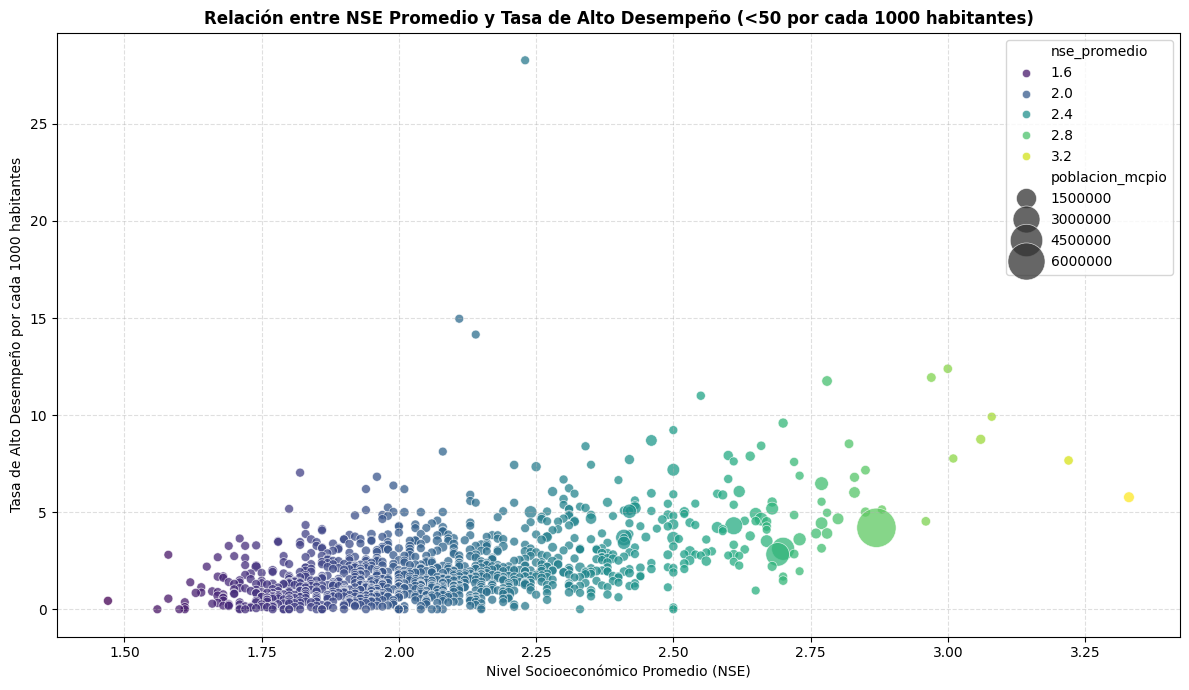

In [64]:
# Filtrar outliers y valores válidos
df_nse_filtrado = df_nse.dropna(subset=["poblacion_mcpio", "tasa_alto_desempeno_1000"])
df_nse_filtrado = df_nse_filtrado[df_nse_filtrado["tasa_alto_desempeno_1000"] < 50]

# Gráfico
plt.figure(figsize=(12,7))
sns.scatterplot(
    data=df_nse_filtrado,
    x="nse_promedio",
    y="tasa_alto_desempeno_1000",
    size="poblacion_mcpio",
    hue="nse_promedio",
    palette="viridis",  
    sizes=(40, 800),
    alpha=0.75,
    legend="brief"
)

# Títulos y formato
plt.title("Relación entre NSE Promedio y Tasa de Alto Desempeño (<50 por cada 1000 habitantes)",
          fontsize=12, weight="bold")
plt.xlabel("Nivel Socioeconómico Promedio (NSE)")
plt.ylabel("Tasa de Alto Desempeño por cada 1000 habitantes")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()



El gráfico muestra la relación entre el Nivel Socioeconómico Promedio (NSE) un indicador que combina variables del entorno familiar, educativo y económico de los estudiantes, como los ingresos, el nivel educativo de los padres y las condiciones del hogar,  y la tasa de alto desempeño académico (número de estudiantes con puntaje global ≥ 300 por cada 1000 habitantes).

Se observa una relación positiva: los municipios con mayor NSE presentan más estudiantes con alto desempeño, mientras que los de NSE bajo concentran menores tasas. Esto evidencia que las condiciones socioeconómicas influyen directamente en el rendimiento educativo, reflejando cómo el entorno familiar y económico impacta las oportunidades de aprendizaje y éxito académico.

"El gráfico excluye valores por encima de 50 para evitar casos atípicos que distorsionan la escala y permitir una mejor visualización de la tendencia general."